### Project Description: Sentiment Analysis

I am given the real data of tweets collected during the outbreak of Covid-19 disease.

The perception of the disease played an important role in providing phychological care to individuals where negative sentiments influenced peoples phychological health. So in terms of that I am doing a sentiment analysis of the collected tweets to find which parts of the world were affected the most from mental trauma and indeed provide a real time analysis of the situation so that these parts can be reached in future in advance if there is any outbreak of a mass disease.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays
import matplotlib.pyplot as plt # for visualizing the data
from wordcloud import WordCloud, STOPWORDS
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import  PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [2]:
!pip install vaderSentiment
import vaderSentiment

In [3]:
df = pd.read_csv('Corona.csv', encoding='latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
df['Location']

0                              London
1                                  UK
2                           Vagabonds
3                                 NaN
4                                 NaN
                     ...             
41152    Wellington City, New Zealand
41153                             NaN
41154                             NaN
41155                             NaN
41156    i love you so much || he/him
Name: Location, Length: 41157, dtype: object

In [6]:
df.dropna(how='all',axis=0,subset=['OriginalTweet'],inplace=True)

We are cleaning the text from unnecessary characters.

In [7]:
def clean_text(text):
  ps=PorterStemmer()
  text_cleaned="".join([x for x in text if x is not string.punctuation])#removing punctuation mark
  text_cleaned=re.sub(' +',' ',text_cleaned)#replace a number of string spaces by a single space
  text_cleaned=text_cleaned.lower()
  tokens=text_cleaned.split(" ")
  tokens=[token for token in tokens if token not in STOPWORDS]
  text_cleaned=" ".join([ps.stem(token) for token in tokens])

  return text_cleaned

In [8]:
df['cleaned_tweets']=df['OriginalTweet'].apply(lambda x:clean_text(x))

Initializing a sentiment analyzer object using the SentimentIntensityAnalyzer() from the Natural Language Toolkit (NLTK) library in Python. This analyzer is commonly used for sentiment analysis tasks to determine the sentiment polarity of text data.

In [9]:
analyser=SentimentIntensityAnalyzer()

In [10]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [11]:
df['tweet_score']=df['OriginalTweet'].apply(lambda x:compound_score(x))
df['tweet_score']

0        0.0000
1        0.2500
2        0.4588
3        0.8456
4        0.5382
          ...  
41152    0.0000
41153   -0.6369
41154    0.4184
41155    0.0258
41156   -0.4576
Name: tweet_score, Length: 41157, dtype: float64

In [12]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [13]:
df['tweet_category']=df['tweet_score'].apply(lambda x :sentiment_category(x))

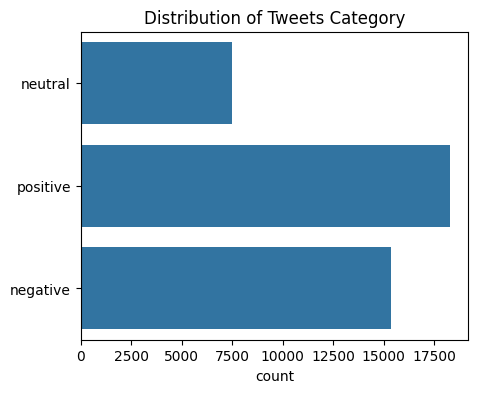

In [14]:
# Create the countplot
ax = sns.countplot(df['tweet_category'])

# Set the title of the plot
ax.set_title("Distribution of Tweets Category")

# Remove the label for the y-axis
ax.set_ylabel('')

# Set the figure size
plt.gcf().set_size_inches(5, 4)

# Show the plot
plt.show()

In [15]:
positive_reviews=df.loc[df['tweet_category']=='positive','cleaned_tweets'].tolist()
positive_reviews[0:5]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia: woolworth give elderly, disabl dedic shop hour amid covid-19 outbreak https://t.co/binca9vp8p',
 'food stock one empty...\r\r\n\r\r\nplease, panic, will enough food everyon take need. \r\r\nstay calm, stay safe.\r\r\n\r\r\n#covid19fr #covid_19 #covid19 #coronaviru #confin #confinementot #confinementgener https://t.co/zrlg0z520j',
 'me, readi go supermarket #covid19 outbreak.\r\r\n\r\r\nnot paranoid, food stock litterali empty. #coronaviru seriou thing, please, panic. caus shortage...\r\r\n\r\r\n#coronavirusfr #restezchezv #stayathom #confin https://t.co/usmualq72n',
 'news regionâ\x92 first confirm covid-19 case came sullivan counti last week, peopl flock area store purchas clean supplies, hand sanitizer, food, toilet paper goods, @tim_dodson report https://t.co/cfxch7a2lu']

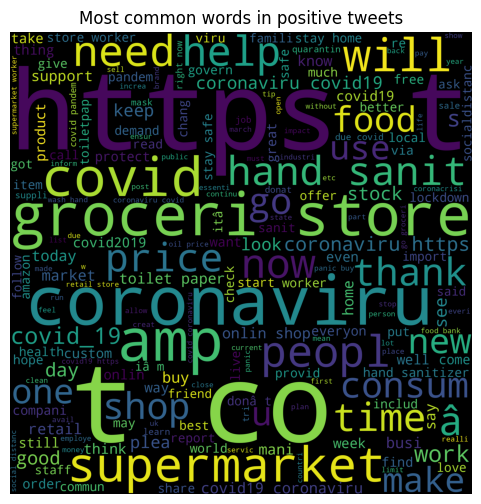

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['tweet_category']=='positive','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.gcf().set_size_inches(6, 6)
plt.title("Most common words in positive tweets")
plt.axis('off')
plt.show()

In [17]:
negative_reviews=df.loc[df['tweet_category']=='negative','cleaned_tweets'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['supermarket today. buy toilet paper. #rebel\r\r\n\r\r\n#toiletpapercrisi #covid_19 https://t.co/evxkqlidaz',
 'corona prevention,w stop buy thing cash use onlin payment method corona spread notes. prefer onlin shop home. time fight covid 19?. #govindia #indiafightscorona',
 '100 nation infict covid 19 world must play fair china 100 gover must demand china adopt new guild line food safti chines gover guilti irosponc life global scale',
 '@10downingstreet @grantshapp done ensur food essenti product re-stock supermarket panic buy activ discouraged? left checkout staff polic action selfish profit',
 'prepar higher demand potenti food shortage, hunger coalit purchas 10 percent food implement new protocol due covid-19 coronavirus. https://t.co/5cecytlnyn']

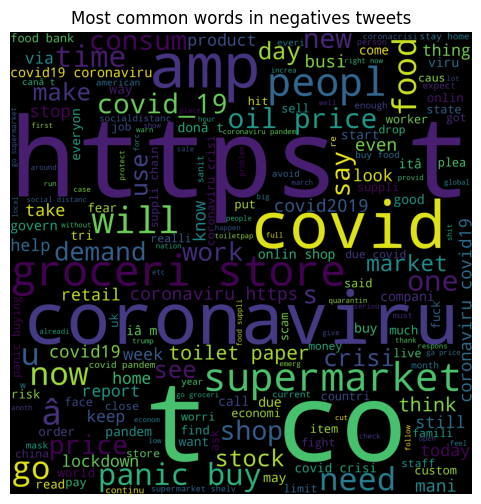

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['tweet_category']=='negative','cleaned_tweets'].tolist()))
plt.imshow(wordcloud)
plt.gcf().set_size_inches(6, 6)
plt.title("Most common words in negatives tweets")
plt.axis('off')
plt.show()

In [19]:
from collections import Counter
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")


    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [20]:
getMostCommon(df['cleaned_tweets'].tolist(),topn=30)

[('#coronaviru', 12958),
 ('price', 7530),
 ('store', 6600),
 ('groceri', 6264),
 ('supermarket', 6171),
 ('food', 6029),
 ('covid-19', 5369),
 ('peopl', 4999),
 ('consum', 4656),
 ('will', 4488),
 ('shop', 4086),
 ('go', 4033),
 ('#covid19', 3974),
 ('&amp;', 3566),
 ('19', 3413),
 ('need', 3205),
 ('onlin', 2958),
 ('covid', 2827),
 ('work', 2640),
 ('buy', 2635),
 ('#covid_19', 2539),
 ('hand', 2502),
 ('time', 2450),
 ('help', 2419),
 ('now', 2240),
 ('stock', 2222),
 ('-', 2163),
 ('panic', 2148),
 ('worker', 2091),
 ('make', 2072)]

In [21]:
reviews_list=df['cleaned_tweets'].tolist()

In [22]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Tweets Words",color="green",axis=None): #default number of words is given as 30
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

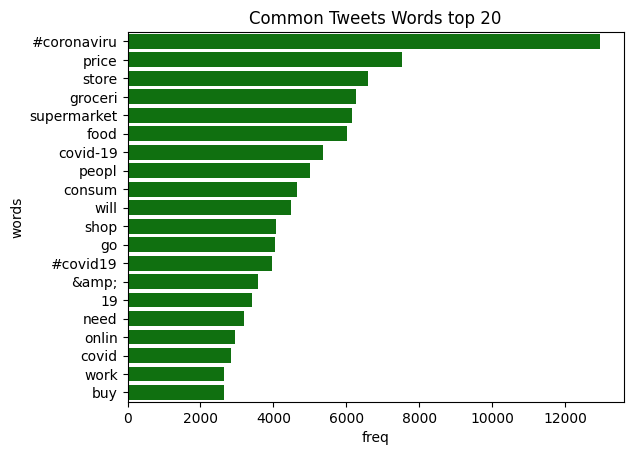

In [23]:
plotMostCommonWords(reviews_list)

In [24]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)
top_20_positive_review_words

[('#coronaviru', 5619),
 ('store', 3176),
 ('groceri', 3017),
 ('price', 2760),
 ('supermarket', 2688),
 ('food', 2481),
 ('covid-19', 2214),
 ('consum', 2113),
 ('will', 2102),
 ('peopl', 2046),
 ('shop', 2018),
 ('hand', 2018),
 ('help', 1929),
 ('#covid19', 1863),
 ('&amp;', 1825),
 ('go', 1742),
 ('19', 1566),
 ('onlin', 1560),
 ('need', 1553),
 ('sanit', 1410)]

In [25]:
top_20_negative_review_words=getMostCommon(negative_reviews,30)
top_20_negative_review_words

[('#coronaviru', 4825),
 ('price', 3658),
 ('food', 2999),
 ('peopl', 2394),
 ('supermarket', 2379),
 ('store', 2185),
 ('covid-19', 2147),
 ('groceri', 2100),
 ('will', 1794),
 ('go', 1707),
 ('panic', 1700),
 ('consum', 1561),
 ('buy', 1466),
 ('&amp;', 1379),
 ('19', 1365),
 ('shop', 1336),
 ('need', 1258),
 ('#covid19', 1247),
 ('covid', 1164),
 ('demand', 1099),
 ('work', 963),
 ('#covid_19', 952),
 ('time', 948),
 ('oil', 920),
 ('crisi', 869),
 ('now', 869),
 ('stock', 851),
 ('due', 834),
 ('-', 833),
 ('onlin', 812)]

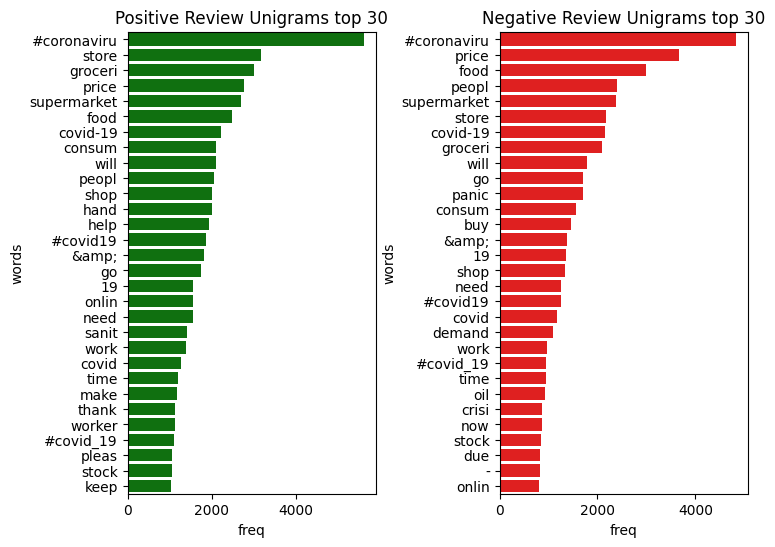

In [26]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,30,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,30,"Negative Review Unigrams",color="red",axis=ax[1])

In [27]:
import geopandas as gpd

In [28]:
# Assuming df is your DataFrame
df_location = df['Location'][df['tweet_category'] == 'negative']

# Extract locations from the filtered DataFrame
negative_locations = df_location.tolist()

#negative_locations

In [29]:
my_list = [value for value in negative_locations if value == value]

my_list = list(filter(lambda x: x == x, my_list))

Most common locations with negative effects:
London: 216
London, England: 202
United States: 173
Washington, DC: 136
United Kingdom: 136
New York, NY: 131
India: 96
Los Angeles, CA: 92
Australia: 91
USA: 89
UK: 88
England, United Kingdom: 82
Canada: 70
Global: 68
Toronto, Ontario: 55
Chicago, IL: 53
California, USA: 53
Mumbai, India: 46
New York, USA: 45
Boston, MA: 44
San Francisco, CA: 44
Atlanta, GA: 44
New Delhi, India: 42
Texas, USA: 42
Washington, D.C.: 40
New York: 40
Austin, TX: 38
Singapore: 37
London, UK: 37
Houston, TX: 34


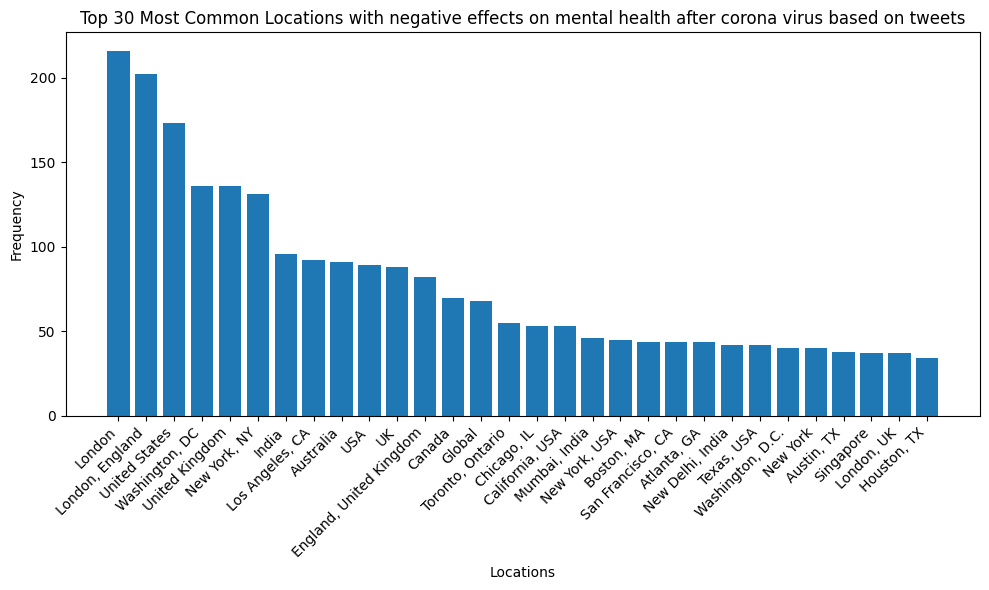

In [30]:
from collections import Counter
import matplotlib.pyplot as plt

# Data cleaning: Remove empty values and strip whitespace
cleaned_locations = [loc.strip() for loc in my_list if loc]

# Count occurrences of each location
location_counts = Counter(cleaned_locations)

# Get the most common locations
most_common_locations = location_counts.most_common(30)  # Change 10 to the desired number of top locations

# Print the most common locations
print("Most common locations with negative effects:")
for location, count in most_common_locations:
    print(f"{location}: {count}")

# Optional: Visualize the data
labels, counts = zip(*most_common_locations)
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Locations with negative effects on mental health after corona virus based on tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Based on the analysis of the provided list of locations, several key insights can be drawn:

- Diversity of Locations: The list includes a wide variety of locations from around the world, indicating a diverse audience or contributors.

- Common Locations: Despite the diversity, certain locations appear more frequently than others. This suggests that some regions or cities are more represented in the dataset.

- Global Reach: The presence of locations from different continents highlights the global reach of the project or dataset.

- Data Quality: The presence of NaN values indicates potential inconsistencies or missing data. These should be handled appropriately to ensure the accuracy of any analysis or conclusions drawn from the dataset.